# Analysis Report: Favorite Albums
**Melyssa Calegari Rein**

**11/21**

## Introduction 

My musical taste is very diverse, I listen to many genres. Proving that, my two favorite albums are Can't be Tamed and NoEasy, respectively, a pop album and an album that contains many different genres (for example, EDM and hip hop). My hypothesis is that when comparing the energy and the tempo from NoEasy and Can't be Tamed, there will be no relation between them. These two audio features were chosen because these albums have a different essence to them, apart from the music style and genre not being the same. Miley Cyrus's album has themes such as romance, party, hurt. Meanwhile, Stray Kids's album talks a lot about haters, fun, angst. Also, when listening to them, it is clear that NoEasy songs are, in general, more energetic and agressive than Can't be Tamed songs.   

All the data for this report comes from Spotify API, which is a Spotify interface that allows people to request information from Spotify (from artists to playlists data) as long as they get a client ID and password to get a session key. The endpoints used are the album endpoint, to get information on an album including its tracks, and the audio features, to get information on an album's songs. This is because when requesting information on an album, only the names of the tracks are important for this report out of all of the other information (for example, available markets and duration of the track) and their ID (which will be given to the audio feature endpoint). Hence, to get more information on the tracks and better understand my tastes, using the audio features endpoints will provide data of the song's characteristics, from danceability to speechness. 

#### NoEasy by Stray Kids
![](https://upload.wikimedia.org/wikipedia/en/thumb/5/59/Stray_Kids_-_Noeasy_%28Digital%29.jpeg/220px-Stray_Kids_-_Noeasy_%28Digital%29.jpeg)

As hinted by the album name and cover, NoEasy (that when spoken, resembles the word Noisy), Stray Kids received a lot of criticism through out their career due to the music they produce that many consider noisy. They have songs in many different genres, from rock to EDM to hip hop. They often mix different sounds and beats into their songs, which might overwhelm some people as they say it is noisy. 

Stray Kids's NoEasy is one of the albums I listened to the most on Spotify, which is a surprise because it is a 2021 album and I have Spotify since 2015, so this shows how this album surprised me and carved its mark on me. This album introduced me to Stray Kids and after that, I started follwing their releases. I love how in NoEasy Stray Kids has no fear in putting their personality into the songs, making their songs "noisy" and exploring different genres and themes. I appreciate their creativity with the more energetic songs, like *Thunderous* and *Cheese*, and the emotion in the less energetic ones, such as *Sorry, I love you*. 

#### Can't be Tamed by Miley Cyrus
![](https://upload.wikimedia.org/wikipedia/en/4/41/Miley_Cyrus_-_Can%27t_Be_Tamed.png) 

I have been listening to Miley Cyrus's songs since I was younger, around 6 years old. So, I have followed her entire discography, but Can't Be Tamed is one of my favorites albums of hers. I don't skip any of the songs in this album, I love them all. I dance along to the more energetic songs and sing along to the less energetic ones. This is not only the album of hers I listen to the most, but also the one I have the most memories of. For instance, I used to listen to this album almost everyday when going to school with  my mother and I used to sing the album's songs with my aunt every now and then.     

## Preparation 

First, I imported all the packages needed to make the requests to Spotify API, to put the data into tables and graphs, and to analyse the statistics of the result.

In [1]:
import requests
import pandas as pd
import base64
import json
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

Then I got my Client ID and Client password, that I had previously put in a csv file, and called it here. I did this because this information cannot be shared, so when calling it like this, it will not appear in the notebook.

In [2]:
Client_ID = pd.read_csv('Spotify_keys.txt')['Client_ID'].iloc[0]

In [3]:
Client_Secret = pd.read_csv('Spotify_keys.txt')['Client_Secret'].iloc[0]

With that information, I put them together and encoded them using base64 in order to give it to Spotify API and request a session key (which will give me access to complete requests on the albums information.) To make sure the process of encoding and transfering information to the API was successful, I used ".status_code" and got back "200" which means I could proceed with my requests. 

In [4]:
client_cred = base64.b64encode(str(Client_ID + ":" + Client_Secret).encode('ascii'))

In [5]:
headers = {"Authorization": "Basic {}".format(client_cred.decode('ascii'))}

In [6]:
payload = {'grant_type' : 'client_credentials'}
url = 'https://accounts.spotify.com/api/token'

In [7]:
session_key_response = requests.post(url = url,data = payload, headers = headers)

In [8]:
session_key_response.status_code

200

In [9]:
session_headers = {"Authorization": "Bearer {}".format(session_key_response.json()['access_token'])}

### Requesting information on the albums

#### NoEasy by Stray Kids

To get information on the NoEasy album, I had to first get the album ID from Spotify, so that I could put it on the url form that the Album endpoint requires. 

In [10]:
noeasy_id = '558tpdCejjVQNFAumRAeQj'

In [11]:
album1_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(noeasy_id)

With that, I got a response and transformed it into json in order to be able to read it in the Jupyter Notebook.

In [12]:
response = requests.get(url = album1_url, headers = session_headers)

In [13]:
data_noeasy = response.json() 

I asked for the keys that the file has, to understand better how to proceed in making a table with the information in it.

In [14]:
data_noeasy.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

So, I created a table with all of the information under "Items" to further understand the information. To show only the first 5 songs in the table so it is not overwhelming, I used the "head" function.

In [15]:
noeasy_df = pd.DataFrame(data_noeasy['items'])
noeasy_df.head()

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,is_local,name,preview_url,track_number,type,uri
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,182080,False,{'spotify': 'https://open.spotify.com/track/7q...,https://api.spotify.com/v1/tracks/7qpSatdWQcRH...,7qpSatdWQcRHA3hpedL2u4,False,CHEESE,https://p.scdn.co/mp3-preview/1b71cfb8503ec564...,1,track,spotify:track:7qpSatdWQcRHA3hpedL2u4
1,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,183266,False,{'spotify': 'https://open.spotify.com/track/0n...,https://api.spotify.com/v1/tracks/0nwTMzpatarz...,0nwTMzpatarzvLvtwwzdCt,False,Thunderous,https://p.scdn.co/mp3-preview/b514180fb13d39aa...,2,track,spotify:track:0nwTMzpatarzvLvtwwzdCt
2,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,198720,False,{'spotify': 'https://open.spotify.com/track/6I...,https://api.spotify.com/v1/tracks/6Ib6RkvLBMD8...,6Ib6RkvLBMD85bov85apSL,False,DOMINO,https://p.scdn.co/mp3-preview/a062539bb8fd4502...,3,track,spotify:track:6Ib6RkvLBMD85bov85apSL
3,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,190146,False,{'spotify': 'https://open.spotify.com/track/23...,https://api.spotify.com/v1/tracks/238HdxvQkmYe...,238HdxvQkmYeSyo6qkPQoU,False,SSICK,https://p.scdn.co/mp3-preview/ca6a709d8ae0c801...,4,track,spotify:track:238HdxvQkmYeSyo6qkPQoU
4,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,201746,False,{'spotify': 'https://open.spotify.com/track/5F...,https://api.spotify.com/v1/tracks/5FM1V3qjHroq...,5FM1V3qjHroqsXRBbL57rW,False,The View,https://p.scdn.co/mp3-preview/808b95684ee512f2...,5,track,spotify:track:5FM1V3qjHroqsXRBbL57rW


After that, I was able to select only the crucial information needed and create a summarized table for the analyzis, which are the name and the ID of the songs. 

In [16]:
noeasy_info_summ = noeasy_df[['name','id']]
noeasy_info_summ.head()

,name,id
0,CHEESE,7qpSatdWQcRHA3hpedL2u4
1,Thunderous,0nwTMzpatarzvLvtwwzdCt
2,DOMINO,6Ib6RkvLBMD85bov85apSL
3,SSICK,238HdxvQkmYeSyo6qkPQoU
4,The View,5FM1V3qjHroqsXRBbL57rW


To get more data on the album's songs, I had to format the songs IDs into one line of information separated by commas and put it into the endpoint.

In [17]:
noeasy_af_url = 'https://api.spotify.com/v1/audio-features?ids={}'.format(','.join(list(noeasy_info_summ['id'])))

In [18]:
audiofeatures_noeasy = requests.get(url = noeasy_af_url, headers = session_headers)

To confirm, I asked for the status code of the request and got back 200, letting me know that I could proceed.

In [19]:
audiofeatures_noeasy.status_code

200

I also had to transform it into json in order to create a table with all of the information provided.

In [20]:
audio_noeasy = audiofeatures_noeasy.json()

In [21]:
audio_noeasy_df = pd.DataFrame(audio_noeasy['audio_features'])
audio_noeasy_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.376,0.946,2,-2.388,1,0.2680,0.0302,0,0.1470,0.581,89.657,audio_features,7qpSatdWQcRHA3hpedL2u4,spotify:track:7qpSatdWQcRHA3hpedL2u4,https://api.spotify.com/v1/tracks/7qpSatdWQcRH...,https://api.spotify.com/v1/audio-analysis/7qpS...,182080,3
1,0.601,0.786,1,-3.706,1,0.2340,0.2130,0,0.2090,0.790,172.156,audio_features,0nwTMzpatarzvLvtwwzdCt,spotify:track:0nwTMzpatarzvLvtwwzdCt,https://api.spotify.com/v1/tracks/0nwTMzpatarz...,https://api.spotify.com/v1/audio-analysis/0nwT...,183267,4
2,0.687,0.866,7,-2.010,1,0.0466,0.0301,0,0.0755,0.696,160.066,audio_features,6Ib6RkvLBMD85bov85apSL,spotify:track:6Ib6RkvLBMD85bov85apSL,https://api.spotify.com/v1/tracks/6Ib6RkvLBMD8...,https://api.spotify.com/v1/audio-analysis/6Ib6...,198720,4
3,0.667,0.829,5,-2.922,0,0.0946,0.0149,0,0.4280,0.505,170.009,audio_features,238HdxvQkmYeSyo6qkPQoU,spotify:track:238HdxvQkmYeSyo6qkPQoU,https://api.spotify.com/v1/tracks/238HdxvQkmYe...,https://api.spotify.com/v1/audio-analysis/238H...,190147,4
4,0.758,0.814,1,-4.132,1,0.1060,0.0558,0,0.1380,0.590,110.001,audio_features,5FM1V3qjHroqsXRBbL57rW,spotify:track:5FM1V3qjHroqsXRBbL57rW,https://api.spotify.com/v1/tracks/5FM1V3qjHroq...,https://api.spotify.com/v1/audio-analysis/5FM1...,201747,4


After looking at the table, I decided to also make a summary for this data to have only the crucial ones for the analysis: energy and tempo. I also had to keep the ID column to then be able to combine it with the tracks names (from the other data frame), as the ID is the only information in common.

In [22]:
audio_summ_noeasy = audio_noeasy_df[['energy','tempo','id']]

In [23]:
combined_noeasy_df = pd.merge(noeasy_info_summ,audio_summ_noeasy, how = 'inner', on = 'id')
combined_noeasy_df

,name,id,energy,tempo
0,CHEESE,7qpSatdWQcRHA3hpedL2u4,0.946,89.657
1,Thunderous,0nwTMzpatarzvLvtwwzdCt,0.786,172.156
2,DOMINO,6Ib6RkvLBMD85bov85apSL,0.866,160.066
3,SSICK,238HdxvQkmYeSyo6qkPQoU,0.829,170.009
4,The View,5FM1V3qjHroqsXRBbL57rW,0.814,110.001
5,"Sorry, I Love You",5kkOHHTccylnkYxDRgDWMs,0.661,100.039
6,Silent Cry,5kBJH5gU89axZDauhfddpy,0.876,104.000
7,Secret Secret,1pLJ9T4v4p68otzCDonbc6,0.743,73.969
8,Star Lost,1LSHzXAZXQH9R1zSEFF8Hz,0.867,128.050
9,"Red Lights (Bang Chan, Hyunjin)",0LatE4S9UtCDwIdGQsFFKL,0.740,127.974


#### Can't be Tamed by Miley Cyrus

Just like what I did with the first album, I got the ID from Can't be Tamed, put it into the albums endpoint, got a response from this request, and transformed it into json.

In [24]:
tamed_id = '69Pf9ExxwjhVFyosKsKWQu'

In [25]:
album2_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(tamed_id)

In [26]:
response2 = requests.get(url = album2_url, headers = session_headers)

In [27]:
data_tamed = response2.json() 

As I already had an idea of what is included in this response, I made a table with the data and then proceeded to create a summarized version of the information, containing only the name and ID for the songs.

In [28]:
tamed_df = pd.DataFrame(data_tamed['items'])
tamed_df.head()

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,is_local,name,preview_url,track_number,type,uri
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,246266,False,{'spotify': 'https://open.spotify.com/track/3i...,https://api.spotify.com/v1/tracks/3icywpqJ6o39...,3icywpqJ6o39VY61BXcGQS,False,Liberty Walk,None,1,track,spotify:track:3icywpqJ6o39VY61BXcGQS
1,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,214853,False,{'spotify': 'https://open.spotify.com/track/4b...,https://api.spotify.com/v1/tracks/4buvG5Kmstm8...,4buvG5Kmstm8UMjSgUrv2X,False,Who Owns My Heart,None,2,track,spotify:track:4buvG5Kmstm8UMjSgUrv2X
2,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,168213,False,{'spotify': 'https://open.spotify.com/track/2r...,https://api.spotify.com/v1/tracks/2r6DdaSbkbwo...,2r6DdaSbkbwoPzuK6NjLPn,False,Can't Be Tamed,None,3,track,spotify:track:2r6DdaSbkbwoPzuK6NjLPn
3,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,228240,False,{'spotify': 'https://open.spotify.com/track/2G...,https://api.spotify.com/v1/tracks/2GFAmPwmQByP...,2GFAmPwmQByPEeWcjiR8AE,False,Every Rose Has Its Thorn,None,4,track,spotify:track:2GFAmPwmQByPEeWcjiR8AE
4,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,189946,False,{'spotify': 'https://open.spotify.com/track/1X...,https://api.spotify.com/v1/tracks/1XSJ3mgsnkT9...,1XSJ3mgsnkT9DnhbXl29uf,False,Two More Lonely People,None,5,track,spotify:track:1XSJ3mgsnkT9DnhbXl29uf


In [29]:
tamed_info_summ = tamed_df[['name','id']]
tamed_info_summ.head()

,name,id
0,Liberty Walk,3icywpqJ6o39VY61BXcGQS
1,Who Owns My Heart,4buvG5Kmstm8UMjSgUrv2X
2,Can't Be Tamed,2r6DdaSbkbwoPzuK6NjLPn
3,Every Rose Has Its Thorn,2GFAmPwmQByPEeWcjiR8AE
4,Two More Lonely People,1XSJ3mgsnkT9DnhbXl29uf


Just like I did previously, I joined all of the songs IDs with a comma so I could pass it to Spotify and request the audio features for these songs. I confirmed that the request was successful by asking for the status code and receiving a 200 response back.

In [30]:
tamed_af_url = 'https://api.spotify.com/v1/audio-features?ids={}'.format(','.join(list(tamed_info_summ['id'])))

In [31]:
audiofeatures_tamed = requests.get(url = tamed_af_url, headers = session_headers)

In [32]:
audiofeatures_tamed.status_code

200

Then, I transformed this file to json and created a data frame with the information provided.

In [33]:
audio_tamed = audiofeatures_tamed.json()

In [34]:
audio_tamed_df = pd.DataFrame(audio_tamed['audio_features'])
audio_tamed_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.573,0.886,10,-3.569,0,0.0403,0.000472,0.0,0.3600,0.581,119.999,audio_features,3icywpqJ6o39VY61BXcGQS,spotify:track:3icywpqJ6o39VY61BXcGQS,https://api.spotify.com/v1/tracks/3icywpqJ6o39...,https://api.spotify.com/v1/audio-analysis/3icy...,246267,4
1,0.571,0.805,9,-4.985,0,0.1290,0.010600,0.0,0.0864,0.356,135.908,audio_features,4buvG5Kmstm8UMjSgUrv2X,spotify:track:4buvG5Kmstm8UMjSgUrv2X,https://api.spotify.com/v1/tracks/4buvG5Kmstm8...,https://api.spotify.com/v1/audio-analysis/4buv...,214853,4
2,0.630,0.910,11,-2.919,0,0.1440,0.028700,0.0,0.1960,0.743,116.980,audio_features,2r6DdaSbkbwoPzuK6NjLPn,spotify:track:2r6DdaSbkbwoPzuK6NjLPn,https://api.spotify.com/v1/tracks/2r6DdaSbkbwo...,https://api.spotify.com/v1/audio-analysis/2r6D...,168213,4
3,0.254,0.657,10,-4.995,1,0.0385,0.190000,0.0,0.0952,0.352,151.045,audio_features,2GFAmPwmQByPEeWcjiR8AE,spotify:track:2GFAmPwmQByPEeWcjiR8AE,https://api.spotify.com/v1/tracks/2GFAmPwmQByP...,https://api.spotify.com/v1/audio-analysis/2GFA...,228240,4
4,0.689,0.808,6,-4.018,1,0.0615,0.005430,0.0,0.0631,0.570,128.015,audio_features,1XSJ3mgsnkT9DnhbXl29uf,spotify:track:1XSJ3mgsnkT9DnhbXl29uf,https://api.spotify.com/v1/tracks/1XSJ3mgsnkT9...,https://api.spotify.com/v1/audio-analysis/1XSJ...,189947,4


After that, I created a data frame with only the necessary informaiton for this analysis.

In [35]:
audio_summ_tamed = audio_tamed_df[['energy','tempo','id']]
audio_summ_tamed.head()

,energy,tempo,id
0,0.886,119.999,3icywpqJ6o39VY61BXcGQS
1,0.805,135.908,4buvG5Kmstm8UMjSgUrv2X
2,0.910,116.980,2r6DdaSbkbwoPzuK6NjLPn
3,0.657,151.045,2GFAmPwmQByPEeWcjiR8AE
4,0.808,128.015,1XSJ3mgsnkT9DnhbXl29uf


With all this information gathered, I combined the tables by the only column in common: ID.

In [36]:
combined_tamed_df = pd.merge(tamed_info_summ,audio_summ_tamed, how = 'inner', on = 'id')
combined_tamed_df

,name,id,energy,tempo
0,Liberty Walk,3icywpqJ6o39VY61BXcGQS,0.886,119.999
1,Who Owns My Heart,4buvG5Kmstm8UMjSgUrv2X,0.805,135.908
2,Can't Be Tamed,2r6DdaSbkbwoPzuK6NjLPn,0.910,116.980
3,Every Rose Has Its Thorn,2GFAmPwmQByPEeWcjiR8AE,0.657,151.045
4,Two More Lonely People,1XSJ3mgsnkT9DnhbXl29uf,0.808,128.015
5,Forgiveness And Love,2kky2FdWijLG4YtQdtaB8p,0.709,99.245
6,Permanent December,4OjxWxKvCxl5FltPukiiX9,0.920,124.985
7,Stay,0Ohi2pjBS1yak2BSgJRaIs,0.698,129.985
8,Scars,2VBbNPioFgkakgcp1jvmN7,0.847,129.873
9,Take Me Along,5mLStGzHrQmlRrjiOLolrk,0.792,120.002


## Graphs

### Histograms
 To create histograms and compare the albums' energy and tempo with one another, I created a figure and an axis and made it have two columns, this way, I can put the histograms side by side.
 
On the first column, I got the combined information table on NoEasy and selected only the Energy feature. I also colored it blue (as the album is blue). In the same column, I selected the Energy feature from the Can't be Tamed data frame, and colored it black (as the album is black). To make it easier to understand and analyze, I made both histograms transparent with alpha. 

On the second column, I focused on the tempo of the albums. So I got the tempo from the NoEasy data frame (in blue too) and the tempo from the Can't be Tamed data frame (also in black). Just like in the first graph, I made them both more transparent to make it easy to analyze their relationship.

I put labels and titles on the graphs to make it easier to undertand the information.

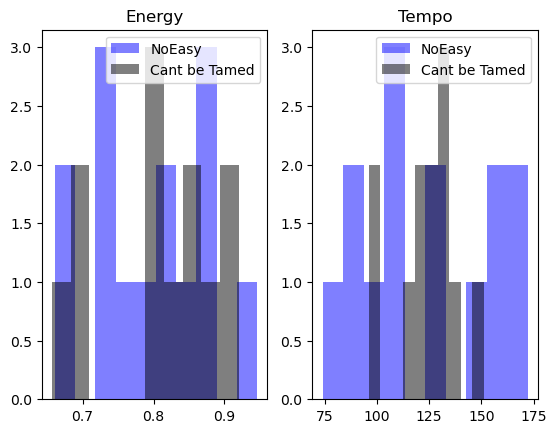

In [37]:
fig1,ax1 = plt.subplots(1,2)
ax1[0].hist(combined_noeasy_df['energy'],
            label = 'NoEasy',
        color='blue',
           alpha=.5)
ax1[0].hist(combined_tamed_df['energy'],
            label = 'Cant be Tamed',
        color='black',
           alpha=.5)
ax1[1].hist(combined_noeasy_df['tempo'],
            label = 'NoEasy',
        color='blue',
           alpha=.5)
ax1[1].hist(combined_tamed_df['tempo'],
            label = 'Cant be Tamed',
        color='black',
           alpha=.5)

ax1[0].set_title('Energy')
ax1[1].set_title('Tempo')

ax1[0].legend()
ax1[1].legend()

plt.show()

It is noticeable that Stray Kids album, NoEasy, has a large range of energy and tempo (from around 0.6 to almost 1 in energy, and from around 75 to 175 BPM). Meanwhile, Miley Cyrus album, Can't be Tamed, has either a lower or higher energy, and around 100 and 150 BPM songs. 

It is possible to see that in NoEasy there is at least one song in each bar range for both audio features, while Can't be Tamed songs has more two songs in the same range. The bars from both albums overlap each other in some ranges but not on all of them, showing how Miley Cyrus's songs are more focused on one style of songs than Stray Kids's songs that play around with many different styles.

### Scatter plots
To analyse the relationship between energy (x) and tempo (y), scatter plots were made. A new figure and axis with two columns was created. 

In blue on the left column, I got the data frame on NoEasy and defined energy as x and tempo as y. On the right in black, I put the energy feature from the Can't be Tamed data frame as x as well, and tempo as y. 

I also inserted title and labels for the graphs to make it easier to understand. I only put label on tempo for NoEasy because the tempo label for Can't be Tamed was appearing inside NoEasy's graph.

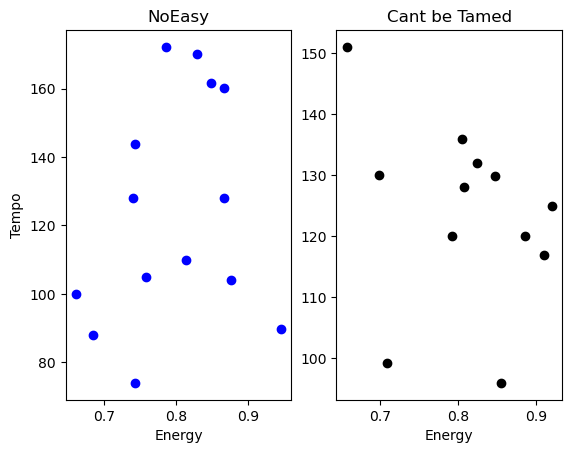

In [38]:
fig2,ax2 = plt.subplots(1,2)
ax2[0].scatter(x= combined_noeasy_df['energy'],
               y= combined_noeasy_df['tempo'],
               color='blue',)
ax2[1].scatter(x= combined_tamed_df['energy'],
               y= combined_tamed_df['tempo'],
               color='black')

ax2[0].set_title('NoEasy')
ax2[1].set_title('Cant be Tamed')

ax2[0].set_xlabel('Energy')
ax2[0].set_ylabel('Tempo')
ax2[1].set_xlabel('Energy')

plt.show()

The x and y ranges are not the same and only looking at the markers might be misleading. However, it is possible to notice how spread Stray Kids songs are when it comes to tempo and energy, showing how they like to explore and try different combinations. Meanwhile, Miley Cyrus songs are more grouped near 130 BPM (with only 3 outliers), while the energy varies more. 

### Combined Scatter Plot

In order to have a better understanding on the scatter plots, the two were combined into the same plot. This way, it would be easier to see if their data has any relation or not. 

So, just as above, the energy is on the x-axis and the tempo is on the y-axis for both albums data frames. The colors are blue and black, respectively for NoEasy and Can't be Tamed. Now, NoEasy's markers on the graph are stars and Can't be Tamed's markers are triangles, in order to help differenciating them. Also, A title and legend were added to help on the visualization of the data. 

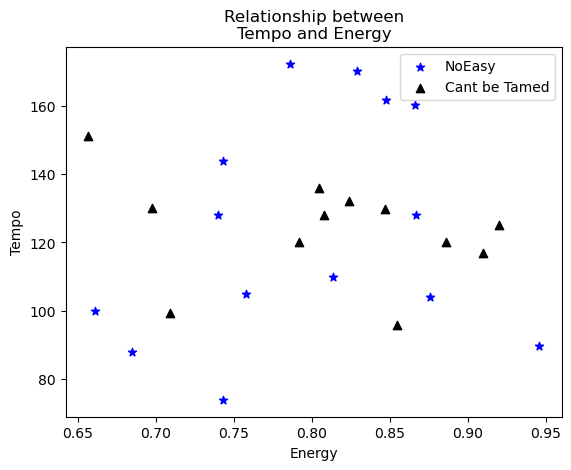

In [39]:
fig3,ax3 = plt.subplots()
ax3.scatter(x=combined_noeasy_df['energy'],
           y=combined_noeasy_df['tempo'],
            label='NoEasy',
           color='blue',
           marker='*')
ax3.scatter(x=combined_tamed_df['energy'],
           y=combined_tamed_df['tempo'],
            label = 'Cant be Tamed',
           color='black',
           marker='^')

ax3.set_title('Relationship between\nTempo and Energy')

ax3.set_xlabel('Energy')
ax3.set_ylabel('Tempo')

ax3.legend()

plt.show()

With the two data together in a graph makes it easier to understand how different the albums are. It is noticeable that six NoEasy songs are farther from Can't be Tamed songs, as they have a lower or higher tempo, or more energy. Hence, we can see how Miley Cyrus's songs are around the middle of the graph and how Stray Kids's songs are in the middle and around on the limits of the graph.

### Box Plots

For the box plots, I decided to analyse only the tempo of each album. I assigned variables to the tempo of each album to be easier to refer to them along the way. I also created variables for the jitter, so the markers would not overlap. Then, I created another figure to put both box plots on each album's tempo in it. Next, I called the jitter and set a transparency to make it easier to analyze it. Finally, I put the Tempo label on the side.

I put NoEasy on the left, Can't be Tamed on the right.

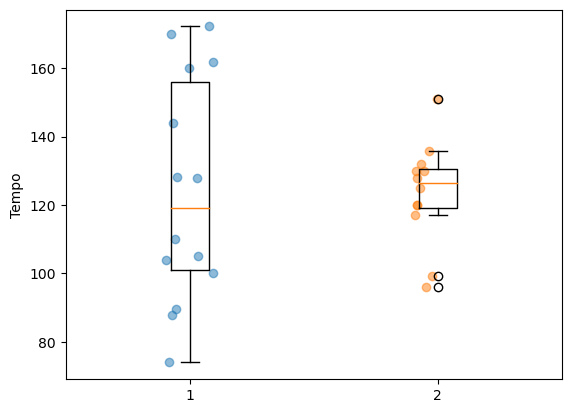

In [40]:
noeasy_tempo = combined_noeasy_df['tempo']
tamed_tempo = combined_tamed_df['tempo']
noeasy_xs =[1]*len(noeasy_tempo)
tamed_xs = [2]*len(tamed_tempo)
noeasy_x_jitter = np.random.uniform(-.10,.10,len(noeasy_xs))
tamed_x_jitter = np.random.uniform(-.10,.0,len(tamed_xs))


fig4,ax4 = plt.subplots()
ax4.boxplot(noeasy_tempo, positions=[1])
ax4.boxplot(tamed_tempo , positions=[2])
ax4.scatter(noeasy_xs+noeasy_x_jitter, noeasy_tempo, alpha=.5)
ax4.scatter(tamed_xs+tamed_x_jitter, tamed_tempo,alpha=.5)

ax4.set_ylabel('Tempo')


plt.show()

Looking at the graphs, it is possible to notice how they both have a mean near 120-130 BPM, but it is also noticeable how Stray Kids box plot on tempo is larger than Miley Cyrus's. It is also aparent how in Can't be Tamed the songs are coloser to the mean tempo, while in Stray Kids, the songs are not that close to the mean. Apart from that, it shows how Cyrus's album there are three outliers as the majority of the songs are around 115-140 BPM and the other three are either near 100 or near 150 BPM. Meanwhile, NoEasy songs are all over the graph, from around 70 to around 180 BPM, with almost always two songs almost overlapping each other, while In Can't be Tamed there is a cluster of songs. This shows how different the tempo of these albums is.

### Statistical Differences

Then, also regarding both album's tempo, I calculated their statistical differences using the scipy's stats.ttest_ind().

In [41]:
results_albums_stats=stats.ttest_ind(noeasy_tempo, tamed_tempo)

First I ran the statistic to know how the data from the albums overlap, and then I ran the pvalue to see how significant their relation is.

In [42]:
results_albums_stats.statistic

0.021028763424134646

In [43]:
round(results_albums_stats.pvalue,5)

0.9834

Looking at their statistic and to the pvalue, it is possible to conclude that they do overlap a lot as the statistic is close to 0, but that the tempo of both albums are not too correlated as the pvalue should be lower than 0.05 to be a significant relation, and in this case it is 0.98. 

## Conclusion

Analyzing the graphs and the statistics, it is clear how different both albums are, which confirms my hypothesis. Stray Kids songs tempo has a large range compared to Miley Cyrus's album. They so try a lot of different genres and styles, using different samples and sounds, so it is no surprise to see a graph with songs' tempos everywhere. The energy in the albums are not too different, Miley Cyrus's songs are either lower or higher energy, while Stray Kids's just vary more in almost the same range.

The limitations of this report is that only two different audio features were analyzed, and to have a better idea on both albums and a deeper understanding on their characteristics, it would be crucial to analyze all album features. As well as for the box plot and the statistic analysis, only the tempo was analyzed, which is a limitation as the conclusion for the relation between the albums' energy could be more specific with further analysis. Also, Spotify defines the energy audio feature as the activity and intensity in a song, and it is analyzed from 0 to 1, which is not too specific on what is considered a high energy song. So, the limitation related to the energy of a song is how Spotify measures it, as this information comes from them and there is not much explanation on it.

Another way to approach this report would be making a deeper and more complete analysis on the albums' energy as well as on other audio features. To take a step further, would be interesting to analyze other albums by the same artists, as they are both two of my favorite artists, to compare even more their music styles and audio features of their songs. Hence, for future reports on this topic, I would analyze the all of audio features to have a deeper understanding on to what extent the albums are different and how they are similar -- as they they both have a place in my favorites list. 